In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score


## Pipeline
1. Load data
1. Scale data
1. Pick number of clusters with Silhoutte Coefficient
    - -1 indicates wrong cluster assignment
    - 0 indicates overlapping clusters
    - +1 indicates well separated cluster

1. Initiate Kmeans model
1. choose k & fit model (vs fit_transform?)
    - `fit`: This method computes the centroids of the clusters. When you call fit(X) on your data, it performs the k-means clustering algorithm and finds the cluster centers but does not return anything (it just fits the model to your data).

    - `fit_transform`: This method both fits the model and transforms the data. In the context of k-means, it fits the model and then returns the distances of each point in your dataset to the centroids of the clusters. output shape = (nrows, K)
1. seeing if selected K is optimal or not
1. score
1. 

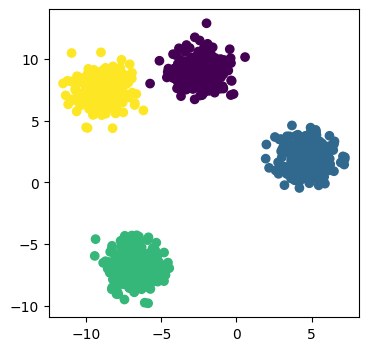

In [2]:
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 4, random_state = 42)

plt.figure(figsize = (4,4))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [3]:
print('Range of first feature: ', X[:,0].min(),X[:,0].max())
print('Range of second feature: ',X[:,1].min(),X[:,1].max())

Range of first feature:  -11.541560049635248 7.213238639477962
Range of second feature:  -9.776364971469636 12.867017618853042


##### We can see that ranges are almost similar. But we will still apply scaling as it is a good practise to do so.

In [4]:
print('Before Transformation: ',X.mean(axis = 0), X.std(axis = 0))

Before Transformation:  [-3.36790375  2.91330962] [5.25601949 6.2675788 ]


###### Method-1

In [5]:
scaler = StandardScaler()
scaler.fit(X)
print('Before Transformation: ',scaler.mean_, np.sqrt(scaler.var_))
X_tr1 = scaler.transform(X)
print('After Transformation: ', X_tr1.mean(axis = 0), X_tr1.std(axis = 0))
print('Range of first feature: ', X_tr1[:,0].min(),X_tr1[:,0].max())
print('Range of second feature: ',X_tr1[:,1].min(),X_tr1[:,1].max())

Before Transformation:  [-3.36790375  2.91330962] [5.25601949 6.2675788 ]
After Transformation:  [-9.34807787e-17 -9.37028233e-17] [1. 1.]
Range of first feature:  -1.5551038798298888 2.0131474805242116
Range of second feature:  -2.024653377050146 1.588126502438333


###### Method-2

In [6]:
X_tr2 = scale(X, axis=0) # does same as Method-1

In [7]:
scaler2 = MinMaxScaler()
scaler2.fit(X)
X_tr3 = scaler2.transform(X)

print('After Transformation: ', X_tr3.mean(axis = 0), X_tr3.std(axis = 0))
print('Range of first feature: ', X_tr3[:,0].min(),X_tr3[:,0].max())
print('Range of second feature: ',X_tr3[:,1].min(),X_tr3[:,1].max())

After Transformation:  [0.4358168  0.56041426] [0.28024932 0.27679516]
Range of first feature:  0.0 1.0
Range of second feature:  0.0 0.9999999999999999


__Now both feature has same range. Let's use `MinMaxScaler`__

Picking __`k`__ for `KMeans`

In [11]:
range_n_clusters = [2, 3, 4, 5, 6, 10, 100]

print('Without Feature Scaling')

for k in range_n_clusters:
    km = KMeans(n_clusters = k, random_state=42)
    cluster_labels = km.fit_predict(X)
    silhoutte_avg = silhouette_score(X, cluster_labels)
    print(f"k = {k}, silhoutte_av = {silhoutte_avg}, inertia = {km.inertia_}")

print('\nAfter Feature Scaling')

for k in range_n_clusters:
    km = KMeans(n_clusters = k, random_state=42)
    cluster_labels = km.fit_predict(X_tr3)
    silhoutte_avg = silhouette_score(X_tr3, cluster_labels)  
    print(f"k = {k}, silhoutte_av = {silhoutte_avg}, inertia = {km.inertia_}")

Without Feature Scaling
k = 2, silhoutte_av = 0.5895787972208197, inertia = 31568.65686738135
k = 3, silhoutte_av = 0.7521964163365819, inertia = 7324.560564741558
k = 4, silhoutte_av = 0.7915983870089952, inertia = 1948.7329193856835
k = 5, silhoutte_av = 0.6799227103294534, inertia = 1791.2305458261162
k = 6, silhoutte_av = 0.5746150221168222, inertia = 1640.374489318551
k = 10, silhoutte_av = 0.3355539566271709, inertia = 1051.5372841691085
k = 100, silhoutte_av = 0.36424512766335937, inertia = 101.13634453608461

After Feature Scaling
k = 2, silhoutte_av = 0.5526581476538661, inertia = 82.83558851199598
k = 3, silhoutte_av = 0.7364339918588659, inertia = 19.61556902518839
k = 4, silhoutte_av = 0.7986082004008346, inertia = 4.624779411773998
k = 5, silhoutte_av = 0.6624796354483065, inertia = 4.214951763181898
k = 6, silhoutte_av = 0.5510634119043814, inertia = 3.7682877993490043
k = 10, silhoutte_av = 0.3311257048507808, inertia = 2.5422883457703227
k = 100, silhoutte_av = 0.344361

__Observations:__
1. As `k` increases, `inertia_` decreases which is good but trade-off is `silhoutte coeff` also reduces

Picking `k` depends on __silhoutte coeff__ and not __interia__.
In this case __k = 4__ because it has highest silhoutee score.

But for sake of this notebook, let's take __k = 3__

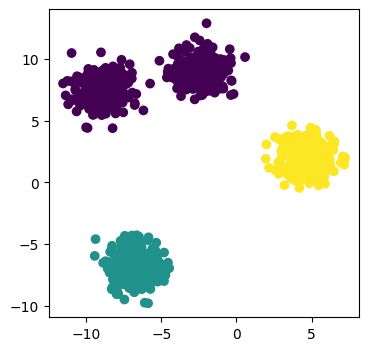

In [12]:
km = KMeans(n_clusters = 3, random_state= 42)
km.fit(X)
plt.figure(figsize = (4,4))
plt.scatter(X[:,0], X[:,1], c=km.predict(X))
plt.show()

In [18]:
adjusted_rand_score(y, km.predict(X))

0.7136715391229579

In [19]:
km = KMeans(n_clusters = 4, random_state= 42)
km.fit(X)
adjusted_rand_score(y, km.predict(X))

0.9973306577635366

In [20]:
km.cluster_centers_

array([[-2.50173875,  9.03287546],
       [-6.74543497, -6.81351756],
       [ 4.65760511,  2.0269603 ],
       [-8.85662684,  7.41339818]])

In [21]:
km.inertia_

1948.7329193856835

In [22]:
km.labels_

array([3, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 3, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3,
       3, 3, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 2, 1, 2, 3,
       2, 3, 0, 2, 3, 2, 1, 0, 2, 3, 0, 3, 0, 0, 0, 1, 1, 0, 1, 3, 2, 0,
       1, 1, 2, 0, 3, 0, 2, 1, 2, 3, 2, 0, 2, 0, 1, 0, 0, 0, 2, 3, 1, 1,
       0, 0, 0, 0, 2, 2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 0, 3, 2, 2, 0, 1, 0,
       3, 1, 2, 2, 2, 2, 1, 3, 1, 2, 0, 1, 3, 2, 3, 1, 2, 3, 1, 2, 0, 1,
       2, 3, 2, 3, 0, 1, 2, 2, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 3, 1, 1,
       0, 2, 0, 2, 2, 3, 1, 0, 2, 1, 0, 0, 2, 1, 3, 1, 2, 0, 0, 2, 0, 3,
       1, 3, 1, 3, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 2, 0, 2, 2, 0, 3, 1, 1,
       1, 3, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 3, 1, 1, 2, 0, 1, 0, 3, 2,
       3, 3, 1, 0, 3, 0, 2, 1, 1, 0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 2, 1, 3,
       1, 2, 3, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 0, 1, 1, 2, 2, 2, 3, 2,
       3, 3, 1, 2, 0, 3, 2, 0, 2, 1, 0, 3, 2, 3, 1, 2, 3, 1, 3, 2, 1, 0,
       0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

###### `fit_predict`

In [42]:
km = KMeans(n_clusters = 3, random_state= 42)
km.fit_predict(X)

array([0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0,
       2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0,
       1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1,
       0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0, 0,
       1, 0, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1,
       1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0,
       1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 0, 2,
       0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

### A bit deeper dive example  
- https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

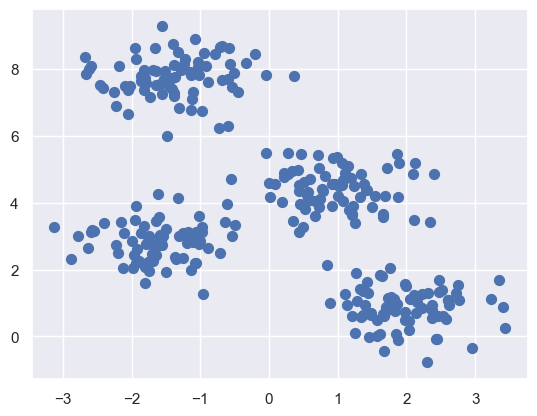

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs


X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

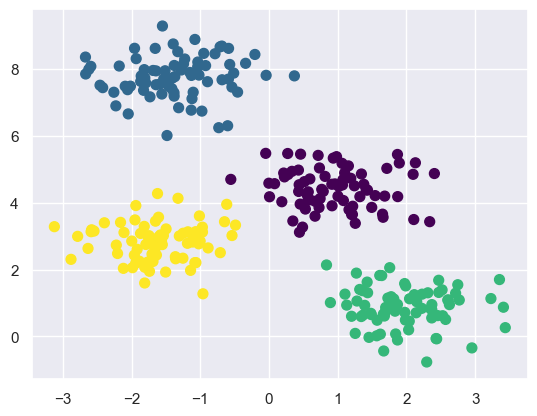

In [2]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');